In [3]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups()
print(news_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


[480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


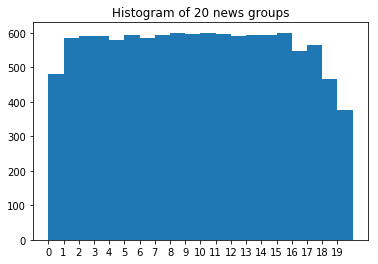

In [4]:
import numpy as np
import matplotlib.pyplot as plt

types = news_data.target
plt.hist(types, bins=np.arange(21))
print(np.histogram(types, bins = np.arange(21))[0])
plt.title("Histogram of 20 news groups")
plt.xticks(np.arange(20))
plt.show()


In [5]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english')
X_train_vec = vectorizer.fit_transform(train_dataset.data)
X_test_vec= vectorizer.fit_transform(test_dataset.data)


X_train_vec.shape

(4732, 16496)

In [7]:
import nltk
from nltk import pos_tag

wnl = nltk.wordnet.WordNetLemmatizer()
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_string(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]

train_lem=[]
for doc in train_dataset.data:
    train_lem.append(' '.join(lemmatize_string(doc)))
    
test_lem=[]
for doc in test_dataset.data:
    test_lem.append(' '.join(lemmatize_string(doc)))

train_lem[1]

#a=lemmatize_sent_demo(train_dataset.data)
#X_train_vec = vectorizer.fit_transform(lemmatize_sent_demo(train_dataset.data))
#X_test_vec= vectorizer.fit_transform(lemmatize_sent_demo(test_dataset.data))

"from : jwh @ sei.cmu.edu ( john huber ) subject : re : nhl team captain organization : the software engineering institute line : 27 in article < 1993apr19.213015 @ iastate.edu > , njdevils @ iastate.edu ( cire y. trehguad ) write : | > anna matyas ( am2x+ @ andrew.cmu.edu ) write : | > : michael collingridge write : | > : > and , while we be on the subject , have a captain ever be trade , | > : > resign , or be strip of his title during the season ? any other | > : > team captain trivia would be appreciate . | > ; | > : be n't ron francis captain of the whaler when he be trade to | > : pittsburgh ? | > | > and rick tochett be the captain of the flyer when trade to the pen | > recently ... | > and of course , mike ramsey be ( at one time ) the captain in buffalo prior to be trade to pittsburgh . currently , the penguin have 3 former captain and 1 real captain ( lemieux ) play for them . they rotate the a 's during the season ( and even the c while mario be out ) . even troy loney have 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english')
X_train_lem_vec = vectorizer.fit_transform(train_lem)
X_test_lem_vec = vectorizer.fit_transform(test_lem)

print(X_train_lem_vec.shape)
print(X_test_lem_vec.shape)

#X_test_vec= vectorizer.fit_transform(test_dataset.data)

(4732, 14301)
(3150, 10761)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=3, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english')

X_train_lem_tfidf_vec = tfidf_vectorizer.fit_transform(train_lem)
X_test_lem_tfidf_vec = tfidf_vectorizer.fit_transform(test_lem)

print(X_train_lem_tfidf_vec.shape)
print(X_test_lem_tfidf_vec.shape)

(4732, 14301)
(3150, 10761)


In [10]:
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
X_train_NMF = model.fit_transform(X_train_lem_tfidf_vec)
X_test_NMF = model.fit_transform(X_test_lem_tfidf_vec)

print(X_train_NMF.shape)

(4732, 50)


In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_LSI = svd.fit_transform(X_train_lem_tfidf_vec)
X_test_LSI= svd.fit_transform(X_test_lem_tfidf_vec)
print(X_train_LSI.shape)

(4732, 50)


In [23]:
#print(train_dataset.target)
#print(test_dataset.target)


train_labels = np.array(train_dataset.target >3)
test_labels = np.array(test_dataset.target >3)
#print(train_dataset.filenames[:10])
print(train_labels[:10])
print(test_labels[:10])

[ True  True  True False False False False  True  True False]
[ True False False  True  True  True  True  True  True  True]


--------------------gamma =  0.001  ---------------------------
Confusion Matrix with gamma = 0.001
[[0. 1.]
 [0. 1.]]
Recall Score:
1.0
Precision Score:
0.5047619047619047
Accuracy:
0.5047619047619047
F1 Score:
0.6708860759493671
--------------------gamma =  1000.0  ---------------------------
Confusion Matrix with gamma = 1000.0
[[0.81858974 0.18141026]
 [0.28679245 0.71320755]]
Recall Score:
0.7132075471698113
Precision Score:
0.8002822865208187
Accuracy:
0.7653968253968254
F1 Score:
0.7542401064183571


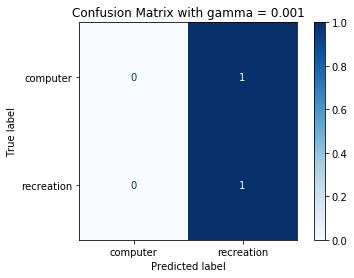

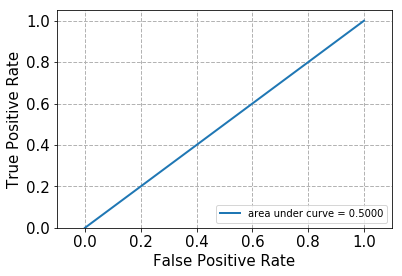

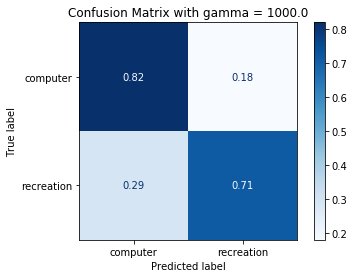

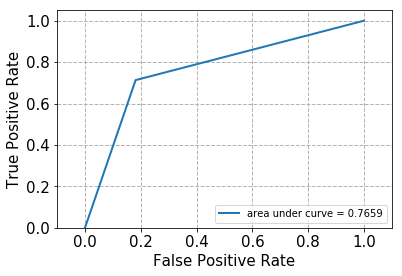

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

gammas = [1.0e-3, 1.0e3]        
for gamma_val in gammas:

    
    print('--------------------gamma = ' , gamma_val ,' ---------------------------')
    svm_classifier = SVC(kernel='poly', gamma=gamma_val)
    svm_classifier.fit(X_train_LSI, train_labels)
    #print(classifier.score(X_test_LSI,test_labels))


    normalize = 'true'
    class_names=['computer','recreation']
    title='Confusion Matrix with gamma = ' + str(gamma_val)
    disp = plot_confusion_matrix(svm_classifier, X_test_LSI, test_labels,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    fpr, tpr, _ = roc_curve(test_labels, svm_classifier.predict(X_test_LSI))
    plot_roc(fpr,tpr)



    print("Recall Score:")
    print(recall_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("Precision Score:")
    print(precision_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("Accuracy:")
    print(accuracy_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("F1 Score:")
    print(f1_score(test_labels, svm_classifier.predict(X_test_LSI)))
    del svm_classifier

-------------- gamma =  0.001  ------------
Confusion Matrix with gamma = 0.001
[[0. 1.]
 [0. 1.]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.8
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4014814814814815
Mean Accuracy Score:
0.49777777777777776
Mean F1 Score:
0.332311686720836
-------------- gamma =  0.01  ------------
Confusion Matrix with gamma = 0.01
[[0. 1.]
 [0. 1.]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.8
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4014814814814815
Mean Accuracy Score:
0.49777777777777776
Mean F1 Score:
0.332311686720836
-------------- gamma =  0.1  ------------
Confusion Matrix with gamma = 0.1
[[0. 1.]
 [0. 1.]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.8
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4014814814814815
Mean Accuracy Score:
0.49777777777777776
Mean F1 Score:
0.332311686720836
-------------- gamma =  1.0  ------------
Confusion Matrix with gamma = 1.0
[[0.01538462 0.98461538]
 [0.         1.        ]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.8294508239893943
Mean Precision Score:
0.7058678045902098
Mean Accuracy Score:
0.634074074074074
Mean F1 Score:
0.5551527536443002
-------------- gamma =  10.0  ------------
Confusion Matrix with gamma = 10.0
[[0.89230769 0.10769231]
 [0.19371069 0.80628931]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.9718883071270008
Mean Precision Score:
0.9806551828140766
Mean Accuracy Score:
0.9760846560846561
Mean F1 Score:
0.9760742416552389
-------------- gamma =  100.0  ------------
Confusion Matrix with gamma = 100.0
[[0.84166667 0.15833333]
 [0.2672956  0.7327044 ]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.9586569579437116
Mean Precision Score:
0.9518263266457124
Mean Accuracy Score:
0.9544973544973544
Mean F

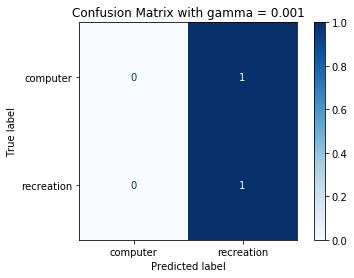

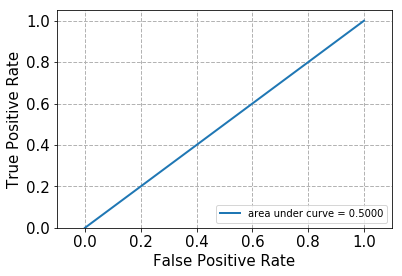

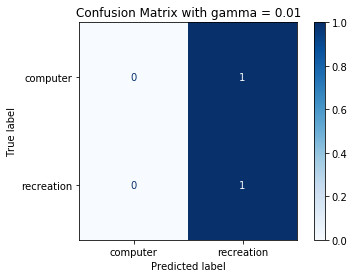

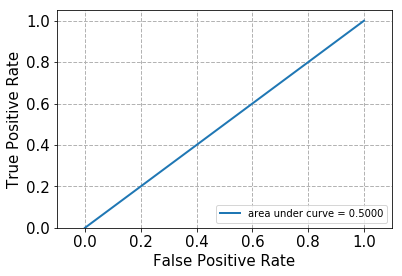

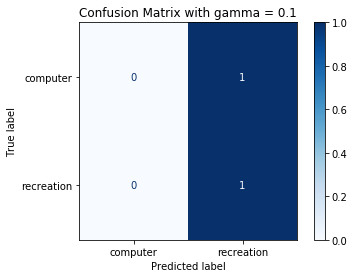

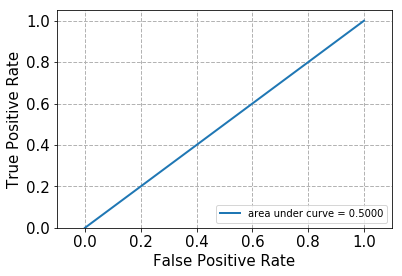

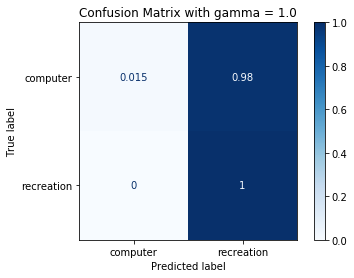

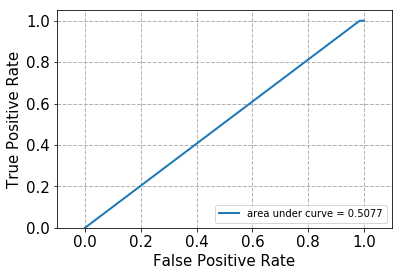

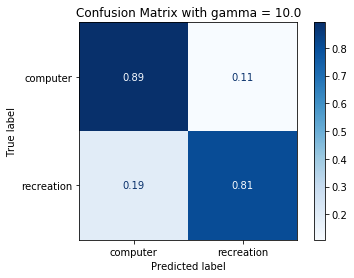

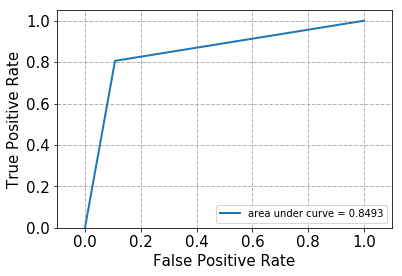

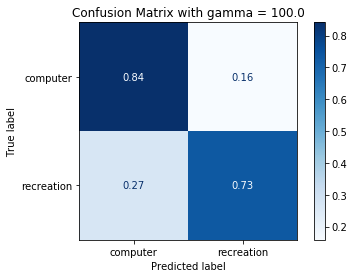

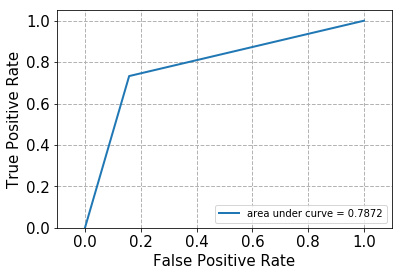

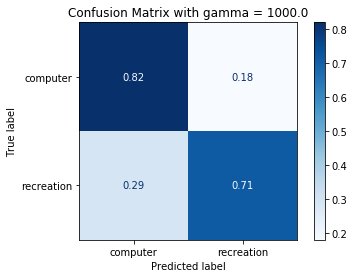

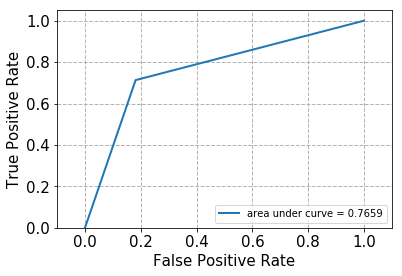

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
# from sklearn import metrics
from sklearn.svm import SVC

powers =np.arange(-3,4)

for power in powers:
    current_gamma = 10.0**power
    print('-------------- gamma = ',current_gamma,' ------------')
    
    clf=SVC(kernel='poly', gamma = current_gamma)
    clf.fit(X_train_LSI, train_labels)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

    
    
    
    normalize = 'true'
    class_names=['computer','recreation']
    title='Confusion Matrix with gamma = ' + str(current_gamma)
    disp = plot_confusion_matrix(clf, X_test_LSI, test_labels,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    fpr, tpr, _ = roc_curve(test_labels, clf.predict(X_test_LSI))
    plot_roc(fpr,tpr)


    print("Mean_score")
    print(np.mean(scores))
    print("Mean Recall Score:")
    rec_scores = cross_val_score(clf, X_test_LSI, test_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(clf, X_test_LSI, test_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(clf, X_test_LSI, test_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(clf, X_test_LSI, test_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

Confusion Matrix with no regularization
[[0.9224359  0.0775641 ]
 [0.24213836 0.75786164]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.9757912580193817
Mean Precision Score:
0.9814609615602222
Mean Accuracy Score:
0.9784126984126983
Mean F1 Score:
0.9784069484997822


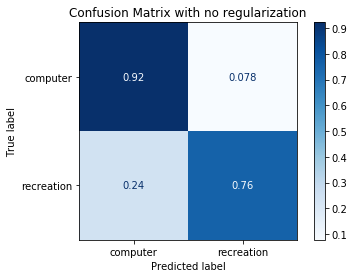

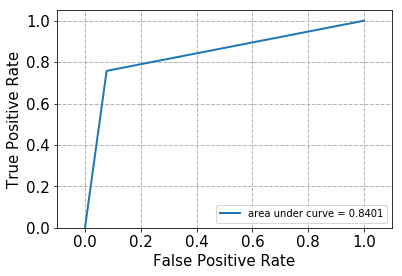

In [68]:
from sklearn.linear_model import LogisticRegression as lr

lr_classifier = lr(penalty='none',max_iter=1000, random_state=0).fit(X_train_LSI, train_labels)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['computer','recreation']
title='Confusion Matrix with no regularization'
disp = plot_confusion_matrix(lr_classifier, X_test_LSI, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

fpr, tpr, _ = roc_curve(test_labels, lr_classifier.predict(X_test_LSI))
plot_roc(fpr,tpr)


print("Mean_score")
print(np.mean(scores))
print("Mean Recall Score:")
rec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='recall')
print(np.mean(rec_scores))
print("Mean Precision Score:")
prec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='precision')
print(np.mean(prec_scores))
print("Mean Accuracy Score:")
acc_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='accuracy')
print(np.mean(acc_scores))
print("Mean F1 Score:")
f1_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='f1_macro')
print(np.mean(f1_scores))

In [72]:
powers = np.arange(-3,4)
for power in powers:
    C_val = 10.0**(power)
    print('-------------L2 regularization with C = ',C_val,' ----------------')
    lr_classifier = lr(penalty='l2',max_iter=1000, random_state=0, C = C_val).fit(X_train_LSI, train_labels)

    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


    print("Mean_score")
    print(np.mean(scores))
    print("Mean Recall Score:")
    rec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

-------------L2 regularization with C =  0.001  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9048979591836733
Mean Precision Score:
0.6137135858402418
Mean Accuracy Score:
0.5737566137566137
Mean F1 Score:
0.45773027742106576
-------------L2 regularization with C =  0.01  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.983987443030221
Mean Precision Score:
0.8529661679613897
Mean Accuracy Score:
0.8979894179894181
Mean F1 Score:
0.895850101608174
-------------L2 regularization with C =  0.1  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9682942973195979
Mean Precision Score:
0.965064777573929
Mean Accuracy Score:
0.9661375661375662
Mean F1 Score:
0.9661253967956768
-------------L2 regularization with C =  1.0  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9703117741088907
Mean Precision Score:
0.9760030690865511
Mean Accuracy Score:
0.972910052910053
Mean F1 Score:
0.9729003771924729
-------------L2 

In [74]:
powers = np.arange(-3,4)
for power in powers:
    C_val = 10.0**(power)
    print('-------------L1 regularization with C = ',C_val,' ----------------')
    lr_classifier = lr(penalty='l1',max_iter=1000, random_state=0, C = C_val, solver='liblinear').fit(X_train_LSI, train_labels)

    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


    print("Mean_score")
    print(np.mean(scores))
    print("Mean Recall Score:")
    rec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(lr_classifier, X_test_LSI, test_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

-------------L1 regularization with C =  0.001  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.0
Mean Precision Score:
0.0
Mean Accuracy Score:
0.49481481481481476
Mean F1 Score:
0.3309947042987665

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin


-------------L1 regularization with C =  0.01  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.0
Mean Precision Score:
0.0
Mean Accuracy Score:
0.49481481481481476
Mean F1 Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

0.3309947042987665
-------------L1 regularization with C =  0.1  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9505412834898996
Mean Precision Score:
0.9419339473398309
Mean Accuracy Score:
0.9453968253968255
Mean F1 Score:
0.945363621283939
-------------L1 regularization with C =  1.0  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9656812443233104
Mean Precision Score:
0.9693202273374789
Mean Accuracy Score:
0.967195767195767
Mean F1 Score:
0.9671834345870953
-------------L1 regularization with C =  10.0  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9741158576772951
Mean Precision Score:
0.9789623916689267
Mean Accuracy Score:
0.9762962962962962
Mean F1 Score:
0.9762888093438743
-------------L1 regularization with C =  100.0  ----------------
Mean_score
0.9544805006859779
Mean Recall Score:
0.9770275786345841
Mean Precision Score:
0.9831232685638123
Mean Accuracy Score:
0.9798941798941799
Mean F1 Score:
0.9798882010833

Confusion Matrix with no regularization
[[0.68910256 0.31089744]
 [0.3163522  0.6836478 ]]
Mean_score
0.9544805006859779
Mean Recall Score:
0.8360336465936186
Mean Precision Score:
0.8704457163519974
Mean Accuracy Score:
0.8541798941798943
Mean F1 Score:
0.8541484515698077


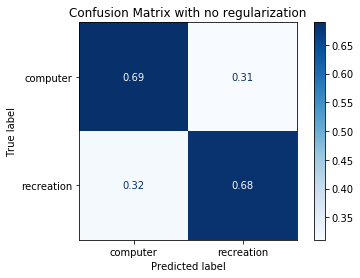

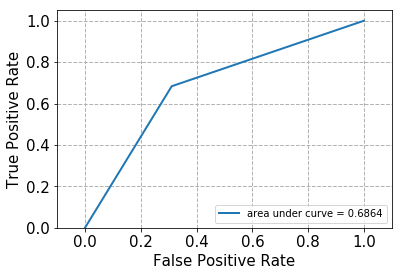

In [75]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB().fit(X_train_LSI, train_labels)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['computer','recreation']
title='Confusion Matrix with no regularization'
disp = plot_confusion_matrix(gauss, X_test_LSI, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

fpr, tpr, _ = roc_curve(test_labels, gauss.predict(X_test_LSI))
plot_roc(fpr,tpr)


print("Mean_score")
print(np.mean(scores))
print("Mean Recall Score:")
rec_scores = cross_val_score(gauss, X_test_LSI, test_labels, cv=cv, scoring='recall')
print(np.mean(rec_scores))
print("Mean Precision Score:")
prec_scores = cross_val_score(gauss, X_test_LSI, test_labels, cv=cv, scoring='precision')
print(np.mean(prec_scores))
print("Mean Accuracy Score:")
acc_scores = cross_val_score(gauss, X_test_LSI, test_labels, cv=cv, scoring='accuracy')
print(np.mean(acc_scores))
print("Mean F1 Score:")
f1_scores = cross_val_score(gauss, X_test_LSI, test_labels, cv=cv, scoring='f1_macro')
print(np.mean(f1_scores))

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)


NameError: name 'TfidfTransformer' is not defined